In [1]:
import pandas as pd
from h5py.h5ds import iterate

In [2]:
from pathlib import Path

**Reading data**

In [ ]:

#CIC 2017
#files = Path("../data/MachineLearningCVE/").rglob("*.csv")
#CIC 2018
#files = Path("../data/").glob("*.csv")
files = Path("E:\dataset\CSE-CIC-IDS2018\CSE-CIC-IDS2018/").glob("*.csv")
#NFSU_UNSW-NB15
#files = Path("../data/NB15").glob("*.csv")
df = list()


In [4]:
df = list()
files = Path("../data/").glob("*.csv")

for file in files:
    df_seq = pd.read_csv(file, low_memory=False)
    col = list(df_seq)
    print(col)
    #print(df_seq.columns.isin(['Src IP', 'Flow IP', 'Src Port']).any())
    if df_seq.columns.isin(['Flow ID', 'Src IP', 'Src Port', 'Dst IP']).any():
        df_seq.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1, inplace=True)
        print('test \n',list(df_seq))
    df.append(df_seq)
    
df

['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd By

[         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
 0             443         6  02/03/2018 08:47:38         141385             9   
 1           49684         6  02/03/2018 08:47:38            281             2   
 2             443         6  02/03/2018 08:47:40         279824            11   
 3             443         6  02/03/2018 08:47:40            132             2   
 4             443         6  02/03/2018 08:47:41         274016             9   
 ...           ...       ...                  ...            ...           ...   
 1048570      3389         6  02/03/2018 02:08:18        3982183            14   
 1048571      3389         6  02/03/2018 02:08:22        3802316            14   
 1048572      3389         6  02/03/2018 02:08:25        4004239            14   
 1048573      3389         6  02/03/2018 02:08:29        3998435            14   
 1048574      3389         6  02/03/2018 02:08:33        3972651            14   
 
          Tot 

In [5]:
df = pd.concat(df)

Renaming columns, removing spaces, switching to lowerecase.

In [6]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

**Renaming labels**

In [7]:
label_names = df['label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['Benign',
  'Bot',
  'DoS_attacksSlowHTTPTest',
  'DoS_attacksHulk',
  'Label',
  'Brute_Force_Web',
  'Brute_Force_XSS',
  'SQL_Injection',
  'DDoS_attacksLOICHTTP',
  'Infilteration',
  'DoS_attacksGoldenEye',
  'DoS_attacksSlowloris',
  'FTPBruteForce',
  'SSHBruteforce',
  'DDOS_attackLOICUDP',
  'DDOS_attackHOIC'],
 16)

In [8]:
# Replacing 'Label' column values with new readable values.

labels = df['label'].unique()

for i in range(0,len(label_names)):
    df['label'] = df['label'].replace({labels[i] : label_names[i]})

In [9]:
df = df[df['label'] != 'Label']

In [10]:
df.label.unique()

array(['Benign', 'Bot', 'DoS_attacksSlowHTTPTest', 'DoS_attacksHulk',
       'Brute_Force_Web', 'Brute_Force_XSS', 'SQL_Injection',
       'DDoS_attacksLOICHTTP', 'Infilteration', 'DoS_attacksGoldenEye',
       'DoS_attacksSlowloris', 'FTPBruteForce', 'SSHBruteforce',
       'DDOS_attackLOICUDP', 'DDOS_attackHOIC'], dtype=object)

**Removing NULL values**

In [ ]:
%%sql


In [11]:
df.isnull().values.any()

True

In [12]:
[col for col in df if df[col].isnull().values.any()]

['flow_byts/s']

In [13]:
df['flow_byts/s'].isnull().sum()
#df['flow_id'].isnull().sum()
#df['src_ip'].isnull().sum()
#df['src_port'].isnull().sum()
#df['dst_ip'].isnull().sum()


59721

In [14]:
df

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613101,445,6,28/02/2018 12:52:55,732728,2,2,0,0,0,0,...,32,0,0,0,0,0,0,0,0,Benign
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [13]:
benign_df = df[df['label']=='Benign']
nign_df = df[df['label']!='Benign']

In [14]:
benign_split_df = benign_df[:len(nign_df)]
benign_split_df

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067256,80,6,20/02/2018 02:44:13,4472851,4,4,97.0,231.0,97.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1067257,445,6,20/02/2018 02:42:48,1065028,6,5,1453.0,338.0,1084.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1067258,445,6,20/02/2018 02:44:51,245339,3,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1067259,445,6,20/02/2018 02:44:51,1307798,7,5,364.0,582.0,103.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [15]:
nign_df

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
1234,8080,6,02/03/2018 10:17:07,16079,3,4,326,129.0,326,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1235,8080,6,02/03/2018 10:17:07,577,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1236,8080,6,02/03/2018 10:17:09,10279,3,4,326,129.0,326,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1237,8080,6,02/03/2018 10:17:09,457,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1240,8080,6,02/03/2018 10:17:11,10271,3,4,326,129.0,326,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613098,20000,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [16]:
mix_df = pd.concat([benign_split_df, nign_df])
mix_df

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613098,20000,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [28]:
del([files, file, df_seq, benign_split_df, benign_df, nign_df])

In [17]:
[col for col in df if mix_df[col].isnull().values.any()]
mix_df['flow_byts/s'].isnull().sum()

9083

In [18]:
(9083 / mix_df.shape[0])*100

0.16525151597297902

In [19]:
before = mix_df.shape

mix_df.dropna(inplace=True)

after = mix_df.shape

before[0] - after[0]

9083

In [20]:
mix_df.isnull().any().any()

False

**Removing infinite values**

In [21]:
import numpy as np

In [22]:
mix_df#%% md


,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613098,20000,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [23]:
mix_df.drop('timestamp', axis=1, inplace=True)


In [61]:
mixed_df = mix_df.copy()

In [62]:
mixed_df.loc[mix_df['label']=='Benign', 'label'] = 0
mixed_df.loc[mix_df['label']!='Benign', 'label'] = 1

In [63]:
mixed_df[mixed_df['label']==0]

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,49684,6,281,2,1,38,0.0,38,0,19.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,443,6,132,2,0,0,0.0,0,0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067256,80,6,4472851,4,4,97.0,231.0,97.0,0.0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1067257,445,6,1065028,6,5,1453.0,338.0,1084.0,0.0,242.166667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1067258,445,6,245339,3,1,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1067259,445,6,1307798,7,5,364.0,582.0,103.0,0.0,52.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
#df.iloc[:,:-1]
dq = mix_df.iloc[:,:-1]
def is_not_numeric(x):
    try:
        float(x)
        return None  # 숫자로 변환되면 False 반환
    except ValueError:
        print(x)
        return x  # 숫자로 변환되지 않으면 True 반환
    
#non_numeric_rows = mix_df.applymap(lambda x: is_not_numeric(x) is not None )
non_numeric_rows = dq.applymap(lambda x: not isinstance(x, (int, float)))
non_numeric_rows


        dst_port  protocol  flow_duration  tot_fwd_pkts  tot_bwd_pkts  \
0          False     False          False         False         False   
1          False     False          False         False         False   
2          False     False          False         False         False   
3          False     False          False         False         False   
4          False     False          False         False         False   
...          ...       ...            ...           ...           ...   
613098      True      True           True          True          True   
613099      True      True           True          True          True   
613100      True      True           True          True          True   
613102      True      True           True          True          True   
613103      True      True           True          True          True   

        totlen_fwd_pkts  totlen_bwd_pkts  fwd_pkt_len_max  fwd_pkt_len_min  \
0                 False            False     

In [64]:
mixed_df = mixed_df.apply(pd.to_numeric, errors='coerce')

In [55]:
for a in mixed_df.dtypes:
    print(a)


int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
int64


In [52]:
non_numeric_cols = list()
for index, row in non_numeric_rows.iterrows():
    for col in dq.columns:
        if row[col]:  # 숫자가 아닌 데이터가 있는 경우
            #print(f"Row {index} data: {dq.at[index, col]}, in column '{col}'")
            try:
                df.at[index, col] = float(df.at[index, col])
            except [ValueError, TypeError]:
                print(f"Row {index} data: {df.at[index, col]}, in column '{col}', type: {type(df.at[index, col])}")
                print(col)
                non_numeric_cols.append(col)

TypeError: catching classes that do not inherit from BaseException is not allowed

In [89]:
for index, d in dq.iloc[:,:-1].iterrows():
    print(d)
    break

dst_port            443
protocol              6
flow_duration    141385
tot_fwd_pkts          9
tot_bwd_pkts          7
                  ...  
active_max            0
active_min            0
idle_mean             0
idle_std              0
idle_max              0
Name: 0, Length: 77, dtype: object


In [ ]:
non_numeric_rows = list()

for i in range(len(dq)):
    for idx, row in enumerate(dq):
    #print(dq.iloc[3])
    #print(idx)
    # for col in dq[row][idx]:
    #     #print(col)
    #     #print(dq[row][idx])
    #     #print(is not isinstance(col, (int, float)))
    #     if not isinstance(col, (int, float)):
    #         #print(col)
    #         try:
    #             a = float(col)
    #         except ValueError:
    #             print(col)
    #             print(type(col))
    #     #break
    #i+=1
        #print(dq[row].iloc[i])
        if not isinstance(dq[row].iloc[i], (int, float)):
            print(isinstance(dq[row].iloc[i], (int, float)))
            #print(dq.iloc[i])
            #print(dq[row].iloc[i])
            try:
                float(dq[row].iloc[i])
            except ValueError:
                print(dq[row].iloc[i])
                break
            
    #print(row)

    #print(idx)
    #break
dq.head()


In [155]:
print(i)

78


In [40]:
for index, row in non_numeric_rows.iterrows():
    for col in dq.columns:
        if row[col]:  # 숫자가 아닌 데이터가 있는 경우
            print(f"Row {index} data: {dq.at[index, col]}, in column '{col}'")

KeyboardInterrupt: 

In [62]:
np.all(np.isfinite(dq))

False

In [65]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in mixed_df.iloc[:,:-1] if not np.all(np.isfinite(mixed_df[col]))]

nonfinite

['flow_byts/s', 'flow_pkts/s']

In [66]:
mixed_df.iloc[:,:-1] = mixed_df.iloc[:,:-1].replace([np.inf, -np.inf], np.nan)

np.any(np.isnan(mixed_df.iloc[:,:-1]))

True

In [67]:
before = mixed_df.shape
print("Before drop", before)

mixed_df.dropna(inplace=True)

print("After drop", mixed_df.shape)
print("The difference", before[0] - mixed_df.shape[0])

del before

Before drop (5487387, 79)
After drop (5482417, 79)
The difference 4970


In [69]:
np.all(np.isfinite(mixed_df.iloc[:,:-1]))

True

**Saving clean data**

In [72]:
mixed_df.to_csv("clean_2018.csv", index=False)

**Data visualization**

In [ ]:
df = pd.read_csv("clean_2018.csv", low_memory=False)

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
label_groupby = mixed_df.label.value_counts()
labels_df = pd.DataFrame({
    'Count':label_groupby, 
    'Ratio':label_groupby/sum(label_groupby),
    'Ratio(%)':(label_groupby/sum(label_groupby))*100
})
labels_df

,Count,Ratio,Ratio(%)
label,,,
1,2746934,0.501044,50.104434
0,2735483,0.498956,49.895566


In [ ]:
plt.figure(figsize=(15,6))
chart = sns.countplot(x='label', data=mixed_df, palette="Set1", legend=False)
#plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

In [33]:
data = df.label.value_counts()

various = sum(data[4:])

data = data[:4]

data['Various'] = various

data

BENIGN      2271320
DoS_Hulk     230124
PortScan     158804
DDoS         128025
Various       39603
Name: label, dtype: int64

Text(0.5, 1.0, 'Udio klasa u skupu podataka')

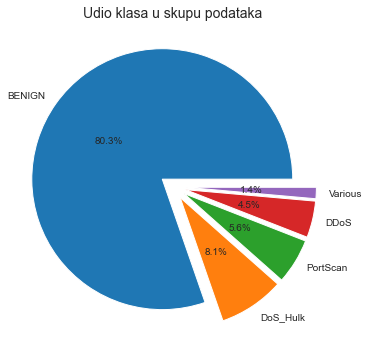

In [34]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data, autopct="%.1f%%", explode=[0.1]*len(data), labels=data.index, pctdistance=0.5)
plt.title("Udio klasa u skupu podataka", fontsize=14)

C:\Users\user\miniconda3\envs\EC-GAN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'DDoS'),
  Text(1, 0, 'PortScan'),
  Text(2, 0, 'Bot'),
  Text(3, 0, 'Infiltration'),
  Text(4, 0, 'Web_Attack_Brute_Force'),
  Text(5, 0, 'Web_Attack_XSS'),
  Text(6, 0, 'Web_Attack_Sql_Injection'),
  Text(7, 0, 'FTPPatator'),
  Text(8, 0, 'SSHPatator'),
  Text(9, 0, 'DoS_slowloris'),
  Text(10, 0, 'DoS_Slowhttptest'),
  Text(11, 0, 'DoS_Hulk'),
  Text(12, 0, 'DoS_GoldenEye'),
  Text(13, 0, 'Heartbleed')])

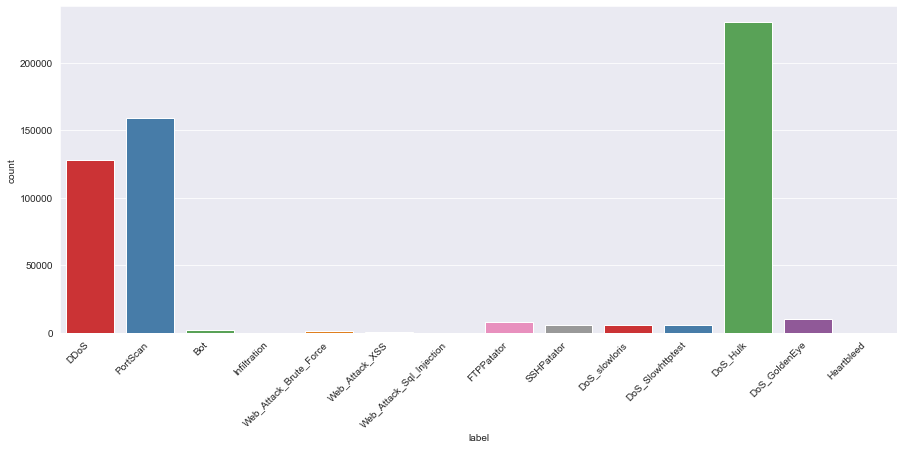

In [35]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df.label.where(df.label != "BENIGN"), palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [36]:
data_2 = df.where(df.label != "BENIGN").label.value_counts()

various = sum(data_2[3:])

data_2 = data_2[:3]

data_2['Various'] = various

data_2

DoS_Hulk    230124
PortScan    158804
DDoS        128025
Various      39603
Name: label, dtype: int64

Text(0.5, 1.0, 'Udio klasa bez BENIGN klase')

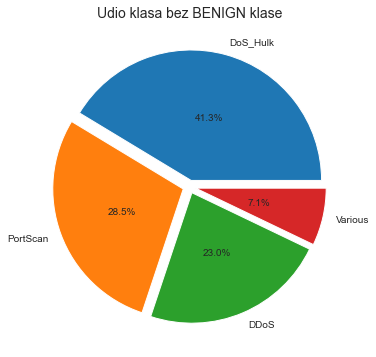

In [37]:
pie, ax = plt.subplots(figsize=[10,6]) 
plt.pie(x=data_2, autopct="%.1f%%", explode=[0.05]*len(data_2), labels=data_2.index, pctdistance=0.5)
plt.title("Udio klasa bez BENIGN klase", fontsize=14)